<a href="https://colab.research.google.com/github/ajaykumar080286/DeepLearning/blob/master/zero_initialization_relu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('1.ushape.csv')

In [4]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [5]:
df.columns = ["X", "Y", "class"]

In [7]:
df = df.round(2)

In [8]:
df.head()

,X,Y,class
0,2.12,-0.05,1.0
1,0.88,-0.08,0.0
2,-0.06,-0.04,1.0
3,0.83,-0.54,1.0
4,2.11,0.66,1.0


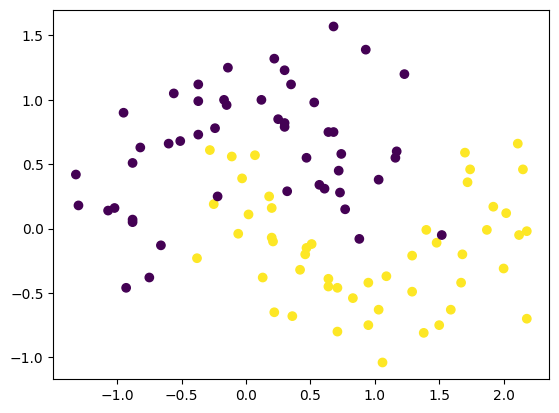

In [9]:
plt.scatter(df['X'], df['Y'], c=df['class'])

In [10]:
df.head(1)

,X,Y,class
0,2.12,-0.05,1.0


In [15]:
X=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [17]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout


In [18]:
model=Sequential()

In [49]:
model.add(Dense(2, activation='tanh', input_dim=2))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │             4 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36 (148.00 B)

 Trainable params: 16 (64.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20 (84.00 B)

In [51]:
initial_weights = model.get_weights()

In [52]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [53]:
model.set_weights(initial_weights)
initial_weights

[array([[0., 0.],
        [0., 0.]]),
 array([0., 0.]),
 array([[0.],
        [0.]]),
 array([0.]),
 array([[ 1.3189796, -1.0990688]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.8619138 ],
        [ 0.11862421]], dtype=float32),
 array([0.], dtype=float32)]

In [54]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [55]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - accuracy: 0.4851 - loss: 0.7396 - val_accuracy: 0.5000 - val_loss: 0.7303
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5203 - loss: 0.7190 - val_accuracy: 0.5000 - val_loss: 0.7295
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4968 - loss: 0.7310 - val_accuracy: 0.5000 - val_loss: 0.7285
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4617 - loss: 0.7490 - val_accuracy: 0.5000 - val_loss: 0.7275
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5164 - loss: 0.7187 - val_accuracy: 0.5000 - val_loss: 0.7266
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4968 - loss: 0.7281 - val_accuracy: 0.5000 - val_loss: 0.7257
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5007 - loss: 0.7251 - val_accuracy: 0.5000 - val_loss: 0.7247
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5046 - loss: 0.7222 - val_accuracy: 0.5000 - val_loss

In [56]:
initial_weights

[array([[0., 0.],
        [0., 0.]]),
 array([0., 0.]),
 array([[0.],
        [0.]]),
 array([0.]),
 array([[ 1.3189796, -1.0990688]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.8619138 ],
        [ 0.11862421]], dtype=float32),
 array([0.], dtype=float32)]

In [57]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([-0.14921738], dtype=float32),
 array([[ 1.1627136, -1.0194682]], dtype=float32),
 array([-0.1590267 ,  0.08041009], dtype=float32),
 array([[-0.7214846 ],
        [-0.02453068]], dtype=float32),
 array([0.15564485], dtype=float32)]

In [58]:
from mlxtend.plotting import plot_decision_regions

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

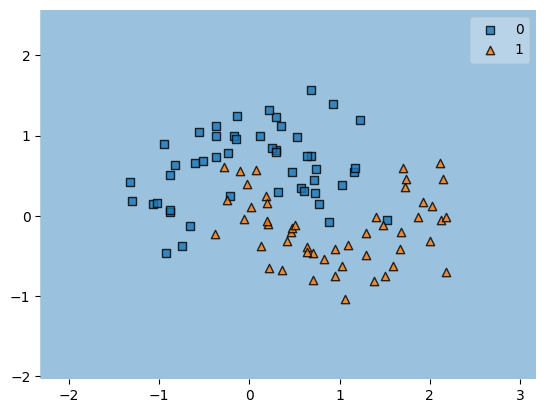

In [59]:
plot_decision_regions(X.values,y.values.astype('int'),model)